In [ ]:
'''
 * Copyright (c) 2005 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

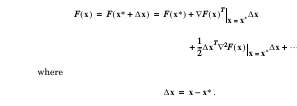

## Necessary Conditions for Optimality 

Now that we have defined what we mean by an optimum (minimum) point, lets identify some conditions that would have to be satisfied by such a point. We will again use the Taylor series expansion to derive these conditions:

### First-Order Conditions for Minimization

Starting with the function approximation around the candidate point $x^*$:

$$
F(x) = F(x^* + \Delta x) = F(x^*) + \nabla F(x) \Delta x \bigg|_{x = x^*} + \frac{1}{2} \Delta x^T \nabla^2 F(x) \Delta x \bigg|_{x = x^*} + \dots
$$

where:

$$
\Delta x = x - x^*.
$$

If $\Delta x$ is small, the higher-order terms can be neglected. Thus, we can approximate the function as:

$$
F(x^* + \Delta x) \approx F(x^*) + \nabla F(x) \Delta x \bigg|_{x = x^*}.
$$

For $x^*$ to be a candidate minimum point, the function should increase (or at least not decrease) when $\Delta x \neq 0$. Hence, the second term should not be negative:

$$
\nabla F(x) \Delta x \geq 0 \bigg|_{x = x^*}.
$$

However, if:

$$
\nabla F(x) \Delta x > 0 \bigg|_{x = x^*},
$$

this would imply:

$$
F(x^* - \Delta x) \approx F(x^*) - \nabla F(x) \Delta x \bigg|_{x = x^*} < F(x^*),
$$

which is a contradiction, since $x^*$ should be a minimum.

Therefore, to satisfy the condition:

$$
\nabla F(x) \Delta x = 0 \bigg|_{x = x^*}.
$$

Since this must hold for any $\Delta x$, we conclude that:

$$
\nabla F(x) \bigg|_{x = x^*} = 0.
$$

Thus, the gradient must be zero at a minimum point. This is a **first-order necessary (but not sufficient) condition** for $x^*$ to be a local minimum. Points that satisfy this condition are called **stationary points**.

### Second-Order Conditions for Minimization

Assume that we have a stationary point $x^*$. Since the gradient of $F(x)$ is zero at all stationary points, the Taylor series expansion around $x^*$ is:

$$
F(x^* + \Delta x) = F(x^*) + \frac{1}{2} \Delta x^T \nabla^2 F(x) \Delta x \bigg|_{x = x^*} + \dots
$$

As before, we consider points in a small neighborhood of $x^*$, so that $\Delta x$ is small and $F(x)$ can be approximated by the first two terms of the Taylor series expansion:

$$
F(x^* + \Delta x) \approx F(x^*) + \frac{1}{2} \Delta x^T \nabla^2 F(x) \Delta x \bigg|_{x = x^*}.
$$

A strong minimum will exist at $x^*$ if:

$$
\Delta x^T \nabla^2 F(x) \Delta x > 0 \bigg|_{x = x^*}.
$$

For this to be true for any arbitrary $\Delta x \neq 0$, the Hessian matrix must be positive definite. By definition, a matrix $A$ is **positive definite** if:

$$
z^T A z > 0
$$

for any vector \(z \neq 0\). It is **positive semidefinite** if:

$$
z^T A z \geq 0
$$

for any vector $z$. We can verify these conditions by checking the eigenvalues of the matrix. If all eigenvalues are positive, then the matrix is positive definite. If all eigenvalues are nonnegative, then the matrix is positive semidefinite.

A **positive definite Hessian matrix** is a second-order, sufficient condition for a strong minimum. However, it is not a necessary condition. A strong minimum can still exist if the second-order term of the Taylor series is zero, but the third-order term is positive.

Thus, the **second-order necessary condition** for a strong minimum is that the Hessian matrix be positive semidefinite.

#### Example: Function of Two Variables

Consider the following function of two variables:

$$
F(x) = x_1^4 + x_2^2.
$$

We first locate any stationary points by evaluating the gradient:

$$
\nabla F(x) = 
\begin{bmatrix} 
4x_1^3 \\ 
2x_2 
\end{bmatrix} = 0.
$$

Thus, the only stationary point is $x^* = (0, 0)$.

Next, we test the second-order condition by calculating the Hessian matrix:

$$
\nabla^2 F(x) \bigg|_{x = 0} = 
\begin{bmatrix} 
12x_1^2 & 0 \\ 
0 & 2 
\end{bmatrix} \bigg|_{x = 0} = 
\begin{bmatrix} 
0 & 0 \\ 
0 & 2 
\end{bmatrix}.
$$

This Hessian matrix is positive semidefinite, which is a necessary condition for $x^* = (0, 0)$ to be a strong minimum.

We cannot guarantee from first-order and second-order conditions alone that it is a minimum point, but we have not ruled it out either. In fact, $x^* = (0, 0)$ is a strong minimum point, even though the Hessian matrix is only positive semidefinite. However, the conditions discussed so far cannot fully prove this.

### Summary of Necessary and Sufficient Conditions

- The **necessary conditions** for $x^*$ to be a minimum (strong or weak) of $F(x)$ are:
  $$\nabla F(x) = 0 \quad \text{and} \quad \nabla^2 F(x) \text{ is positive semidefinite} \bigg|_{x = x^*}.$$

- The **sufficient conditions** for $x^*$ to be a strong minimum of $F(x)$ are:
  $$\nabla F(x) = 0 \quad \text{and} \quad \nabla^2 F(x) \text{ is positive definite} \bigg|_{x = x^*}.$$



In [1]:
import numpy as np
from numpy.linalg import eigvals

# Define the function F(x1, x2)
def F(x):
    x1, x2 = x
    return x1**4 + x2**2

# Compute the gradient of F (first derivatives)
def gradient_F(x):
    x1, x2 = x
    grad_x1 = 4 * x1**3
    grad_x2 = 2 * x2
    return np.array([grad_x1, grad_x2])

# Compute the Hessian matrix of F (second derivatives)
def hessian_F(x):
    x1, x2 = x
    hess = np.array([[12 * x1**2, 0],
                     [0, 2]])
    return hess

# Function to check if the Hessian is positive definite
def is_positive_definite(matrix):
    eigenvalues = eigvals(matrix)
    return np.all(eigenvalues > 0)

# Function to check if the Hessian is positive semidefinite
def is_positive_semidefinite(matrix):
    eigenvalues = eigvals(matrix)
    return np.all(eigenvalues >= 0)

# Test point: stationary point x* = (0, 0)
x_star = np.array([0.0, 0.0])

# Gradient at x* (should be zero at stationary point)
grad_at_x_star = gradient_F(x_star)
print("Gradient at x*:", grad_at_x_star)

# Hessian at x*
hessian_at_x_star = hessian_F(x_star)
print("Hessian at x*:\n", hessian_at_x_star)

# Check positive definiteness and semidefiniteness of Hessian
if is_positive_definite(hessian_at_x_star):
    print("Hessian is positive definite: Strong minimum confirmed.")
elif is_positive_semidefinite(hessian_at_x_star):
    print("Hessian is positive semidefinite: Minimum is possible but not guaranteed to be strong.")
else:
    print("Hessian is not positive semidefinite: No minimum at x*.")


Gradient at x*: [0. 0.]
Hessian at x*:
 [[0. 0.]
 [0. 2.]]
Hessian is positive semidefinite: Minimum is possible but not guaranteed to be strong.


In [2]:
# Define the function F(x1, x2)
def F(x1, x2):
    return x1**4 + x2**2

# Compute the gradient of F (first derivatives)
def gradient_F(x1, x2):
    grad_x1 = 4 * x1**3
    grad_x2 = 2 * x2
    return [grad_x1, grad_x2]

# Compute the Hessian matrix of F (second derivatives)
def hessian_F(x1, x2):
    hess_11 = 12 * x1**2  # second derivative w.r.t x1
    hess_12 = 0            # mixed partial derivative
    hess_21 = 0            # mixed partial derivative
    hess_22 = 2            # second derivative w.r.t x2
    return [[hess_11, hess_12], [hess_21, hess_22]]

# Function to compute the eigenvalues of a 2x2 matrix manually
def eigenvalues_2x2(matrix):
    a, b = matrix[0][0], matrix[0][1]
    c, d = matrix[1][0], matrix[1][1]
    
    # Characteristic equation for eigenvalues: λ^2 - (a + d)λ + (ad - bc) = 0
    trace = a + d
    determinant = a * d - b * c
    discriminant = trace**2 - 4 * determinant

    if discriminant >= 0:
        eigenvalue1 = (trace + discriminant**0.5) / 2
        eigenvalue2 = (trace - discriminant**0.5) / 2
    else:
        # Complex eigenvalues, we'll skip these for real positive definiteness
        eigenvalue1 = eigenvalue2 = None
    
    return eigenvalue1, eigenvalue2

# Function to check if the Hessian is positive definite
def is_positive_definite(matrix):
    eigenvalue1, eigenvalue2 = eigenvalues_2x2(matrix)
    if eigenvalue1 is not None and eigenvalue2 is not None:
        return eigenvalue1 > 0 and eigenvalue2 > 0
    return False

# Function to check if the Hessian is positive semidefinite
def is_positive_semidefinite(matrix):
    eigenvalue1, eigenvalue2 = eigenvalues_2x2(matrix)
    if eigenvalue1 is not None and eigenvalue2 is not None:
        return eigenvalue1 >= 0 and eigenvalue2 >= 0
    return False

# Test point: stationary point x* = (0, 0)
x1_star = 0.0
x2_star = 0.0

# Gradient at x* (should be zero at stationary point)
grad_at_x_star = gradient_F(x1_star, x2_star)
print("Gradient at x*:", grad_at_x_star)

# Hessian at x*
hessian_at_x_star = hessian_F(x1_star, x2_star)
print("Hessian at x*:", hessian_at_x_star)

# Check positive definiteness and semidefiniteness of Hessian
if is_positive_definite(hessian_at_x_star):
    print("Hessian is positive definite: Strong minimum confirmed.")
elif is_positive_semidefinite(hessian_at_x_star):
    print("Hessian is positive semidefinite: Minimum is possible but not guaranteed to be strong.")
else:
    print("Hessian is not positive semidefinite: No minimum at x*.")


Gradient at x*: [0.0, 0.0]
Hessian at x*: [[0.0, 0], [0, 2]]
Hessian is positive semidefinite: Minimum is possible but not guaranteed to be strong.


### Eigenvalues

In a 2x2 matrix, the eigenvalues are calculated using the characteristic equation:

$$
\lambda^2 - (a + d)\lambda + (ad - bc) = 0
$$

The signs of the eigenvalues determine whether the matrix is **positive definite** or **semidefinite**.

- **Positive Definite**: If all eigenvalues are positive, the matrix is positive definite.
- **Positive Semidefinite**: If all eigenvalues are non-negative, the matrix is positive semidefinite.


### Quadratic Functions

We will find throughout this text that one type of performance index is universal — the **quadratic function**. This is true because many applications involve quadratic functions, but also because many functions can be approximated by quadratic functions in small neighborhoods, especially near local minimum points.

The general form of a quadratic function is:

$$
F(x) = \frac{1}{2} x^T A x + d^T x + c,
$$

where the matrix $ A $ is symmetric. (If the matrix is not symmetric, it can be replaced by a symmetric matrix that produces the same $ F(x) $.)

To find the gradient for this function, we use the following useful properties of the gradient:

$$
\nabla (h^T x) = \nabla (x^T h) = h,
$$

where $ h $ is a constant vector, and

$$
\nabla_x (x^T Q x) = Qx + Q^T x = 2 Q x \quad \text{(for symmetric \( Q \))}.
$$

We can now compute the gradient of $ F(x) $:

$$
\nabla F(x) = A x + d,
$$

and similarly, we can find the Hessian:

$$
\nabla^2 F(x) = A.
$$

All higher derivatives of the quadratic function are zero. Therefore, the first three terms of the Taylor series expansion provide an exact representation of the function.

### Eigensystem of the Hessian

To investigate the general shape of the quadratic function, we can look at the **eigenvalues** and **eigenvectors** of the Hessian matrix.

Consider a quadratic function that has a stationary point at the origin, where its value is zero:

$$
F(x) = \frac{1}{2} x^T A x.
$$

The shape of this function is easier to understand if we perform a change of basis using the eigenvectors of the Hessian matrix $ A $ as the new basis vectors. Since $ A $ is symmetric, its eigenvectors will be mutually orthogonal. This means that if we make a matrix with the eigenvectors as the columns, like this:

$$
B = \begin{bmatrix} z_1 & z_2 & \cdots & z_n \end{bmatrix},
$$

the inverse of this matrix will be the same as the transpose:

$$
B^{-1} = B^T.
$$

(We assume the eigenvectors are normalized.)

After performing a change of basis, the new matrix $ A' $ will be diagonal, with the eigenvalues $ \lambda_i $ of $ A $ on the diagonal:

$$
A' = B^T A B = \Lambda = \begin{bmatrix}
\lambda_1 & 0 & \cdots & 0 \\
0 & \lambda_2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \lambda_n
\end{bmatrix}.
$$

We can also write this equation as:

$$
A = B \Lambda B^T.
$$

We will now use the concept of the **directional derivative** to explain the physical meaning of the eigenvalues and eigenvectors of $ A $, and how they determine the shape of the surface of the quadratic function.

Recall from the equation of the second derivative of a function $ F(x) $ in the direction of a vector $ p $:

$$
\frac{p^T \nabla^2 F(x) p}{p^T p} = \frac{p^T A p}{p^T p}.
$$

Now define:

$$
p = Bc,
$$

where $ c $ is the representation of the vector $ p $ with respect to the eigenvectors of $ A $. Using this definition and the equation for $ A $, we can rewrite the second derivative equation as:

$$
\frac{p^T A p}{p^T p} = \frac{c^T B^T A B c}{c^T B^T B c} = \frac{c^T \Lambda c}{c^T c}.
$$

Expanding this sum:

$$
\frac{p^T A p}{p^T p} = \sum_{i=1}^{n} \lambda_i \frac{c_i^2}{\sum_{i=1}^{n} c_i^2}.
$$

This result provides some important insights. The second derivative is a weighted average of the eigenvalues, which means it cannot be larger than the largest eigenvalue or smaller than the smallest eigenvalue. In other words:

$$
\lambda_{\text{min}} \leq \frac{p^T A p}{p^T p} \leq \lambda_{\text{max}}.
$$

Under what conditions will this second derivative be equal to the largest eigenvalue? This happens when we choose:

$$
p = z_{\text{max}},
$$

where $ z_{\text{max}} $ is the eigenvector associated with the largest eigenvalue $ \lambda_{\text{max}} $. In this case, the vector $ c $ will be:

$$
c = B^T p = B^T z_{\text{max}} = \begin{bmatrix} 0 & 0 & \dots & 0 & 1 & 0 & \dots & 0 \end{bmatrix}.
$$




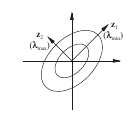

We can rewrite the equation for the matrix $ A $ as:

$$
A = B \Lambda B^T.
$$

We will now use the concept of the **directional derivative** to explain the physical meaning of the eigenvalues and eigenvectors of $ A $, and how they determine the shape of the surface of the quadratic function. Recall that the second derivative in the direction of a vector $ p $ is given by:

$$
\frac{p^T \nabla^2 F(x) p}{p^T p} = \frac{p^T A p}{p^T p}.
$$

Now define:

$$
p = Bc,
$$

where $ c $ is the representation of the vector $ p $ with respect to the eigenvectors of $ A $. Substituting this in and using the fact that $ A = B \Lambda B^T $, we get:

$$
\frac{p^T A p}{p^T p} = \frac{c^T B^T A B c}{c^T B^T B c} = \frac{c^T \Lambda c}{c^T c}.
$$

Expanding this sum gives:

$$
\frac{p^T A p}{p^T p} = \sum_{i=1}^{n} \lambda_i \frac{c_i^2}{\sum_{i=1}^{n} c_i^2}.
$$

This shows that the second derivative is a weighted average of the eigenvalues. Therefore, it is bounded by the minimum and maximum eigenvalues:

$$
\lambda_{\text{min}} \leq \frac{p^T A p}{p^T p} \leq \lambda_{\text{max}}.
$$

If we choose $ p = z_{\text{max}} $, where $ z_{\text{max}} $ is the eigenvector corresponding to the largest eigenvalue $ \lambda_{\text{max}} $, the vector $ c $ will be:

$$
c = B^T p = B^T z_{\text{max}} = \begin{bmatrix} 0 & 0 & \dots & 0 & 1 & 0 & \dots & 0 \end{bmatrix}.
$$

Substituting this into the equation for the second derivative gives:

$$
\frac{z_{\text{max}}^T A z_{\text{max}}}{z_{\text{max}}^T z_{\text{max}}} = \lambda_{\text{max}}.
$$

Thus, the maximum second derivative occurs in the direction of the eigenvector that corresponds to the largest eigenvalue.

### Example 1: Circular Hollow

Consider the function:

$$
F(x) = \frac{1}{2} x^T \begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix} x.
$$

The Hessian matrix is:

$$
\nabla^2 F(x) = \begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix},
$$

with eigenvalues $ \lambda_1 = 2 $ and $ \lambda_2 = 2 $. Since both eigenvalues are equal, the curvature is the same in all directions, resulting in circular contours.

### Example 2: Elliptical Hollow

Consider the quadratic function:

$$
F(x) = \frac{1}{2} x^T \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix} x.
$$

The Hessian matrix is:

$$
\nabla^2 F(x) = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix},
$$

with eigenvalues $ \lambda_1 = 1$ and $ \lambda_2 = 3 $. Since the eigenvalues are distinct, the contours are elliptical, with the maximum curvature along the direction of the eigenvector corresponding to $ \lambda_2 $.

### Example 3: Saddle Point

Now consider a case where the eigenvalues have opposite signs:

$$
F(x) = \frac{1}{2} x^T \begin{bmatrix} -0.5 & -1.5 \\ -1.5 & -0.5 \end{bmatrix} x.
$$

The Hessian matrix is:

$$
\nabla^2 F(x) = \begin{bmatrix} -0.5 & -1.5 \\ -1.5 & -0.5 \end{bmatrix},
$$

with eigenvalues $ \lambda_1 = 1 $ and $ \lambda_2 = -2 $. Since the eigenvalues have opposite signs, the stationary point at $ x^* = 0 $ is a saddle point.



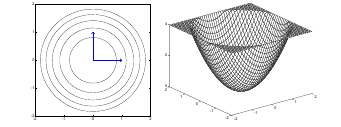

Figure .6 Circular Hollow


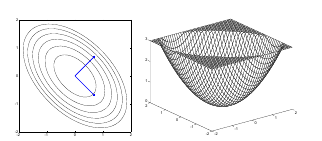

Figure .7 Elliptical Hollow


In [3]:
# Define the quadratic function and its Hessian matrix
def quadratic_function(x, A):
    """
    Evaluate the quadratic function F(x) = 0.5 * x^T A x.
    
    Args:
    x : list of float
        Input vector of length 2.
    A : list of lists (2x2 matrix)
        Hessian matrix representing the quadratic form.
    
    Returns:
    float
        Value of the quadratic function.
    """
    return 0.5 * (A[0][0] * x[0]**2 + (A[0][1] + A[1][0]) * x[0] * x[1] + A[1][1] * x[1]**2)

# Function to compute the eigenvalues of a 2x2 matrix
def compute_eigenvalues(A):
    """
    Compute the eigenvalues of a 2x2 matrix.
    
    Args:
    A : list of lists (2x2 matrix)
        Input 2x2 matrix.
    
    Returns:
    tuple of floats
        Eigenvalues of the matrix.
    """
    # Characteristic equation: λ^2 - (a + d)λ + (ad - bc) = 0
    a = A[0][0]
    b = A[0][1]
    c = A[1][0]
    d = A[1][1]
    
    trace = a + d  # Sum of diagonal elements
    determinant = a * d - b * c  # Determinant of the matrix
    
    # Eigenvalues are the solutions of the quadratic equation
    discriminant = trace**2 - 4 * determinant
    lambda1 = (trace + discriminant**0.5) / 2
    lambda2 = (trace - discriminant**0.5) / 2
    
    return lambda1, lambda2

# Function to compute the eigenvectors of a 2x2 matrix
def compute_eigenvectors(A, eigenvalue):
    """
    Compute the eigenvector corresponding to a given eigenvalue for a 2x2 matrix.
    
    Args:
    A : list of lists (2x2 matrix)
        Input 2x2 matrix.
    eigenvalue : float
        The eigenvalue for which to compute the eigenvector.
    
    Returns:
    list of floats
        Eigenvector corresponding to the eigenvalue.
    """
    a = A[0][0]
    b = A[0][1]
    c = A[1][0]
    d = A[1][1]
    
    # Solving (A - λI) * v = 0
    # We solve the system (a - λ)x + by = 0 and cx + (d - λ)y = 0
    
    if b != 0:
        # Eigenvector calculation for a general matrix
        x = 1
        y = -(a - eigenvalue) / b
    elif c != 0:
        # Handle case where the matrix is diagonal (b = 0)
        x = -(d - eigenvalue) / c
        y = 1
    else:
        # Special case: when the matrix is a diagonal matrix
        x = 1
        y = 0 if a == eigenvalue else 1
    
    # Normalize the vector
    norm = (x**2 + y**2)**0.5
    return [x / norm, y / norm]

# Define Hessian matrix (example)
A = [[2, 1], [1, 2]]

# Compute eigenvalues
eigenvalue1, eigenvalue2 = compute_eigenvalues(A)

# Compute eigenvectors
eigenvector1 = compute_eigenvectors(A, eigenvalue1)
eigenvector2 = compute_eigenvectors(A, eigenvalue2)

# Output results
print("Eigenvalue 1:", eigenvalue1)
print("Eigenvector 1:", eigenvector1)
print("Eigenvalue 2:", eigenvalue2)
print("Eigenvector 2:", eigenvector2)

# Test the quadratic function
x = [1, 2]
result = quadratic_function(x, A)
print("Quadratic function F(x) at x =", x, ":", result)


Eigenvalue 1: 3.0
Eigenvector 1: [0.7071067811865475, 0.7071067811865475]
Eigenvalue 2: 1.0
Eigenvector 2: [0.7071067811865475, -0.7071067811865475]
Quadratic function F(x) at x = [1, 2] : 7.0


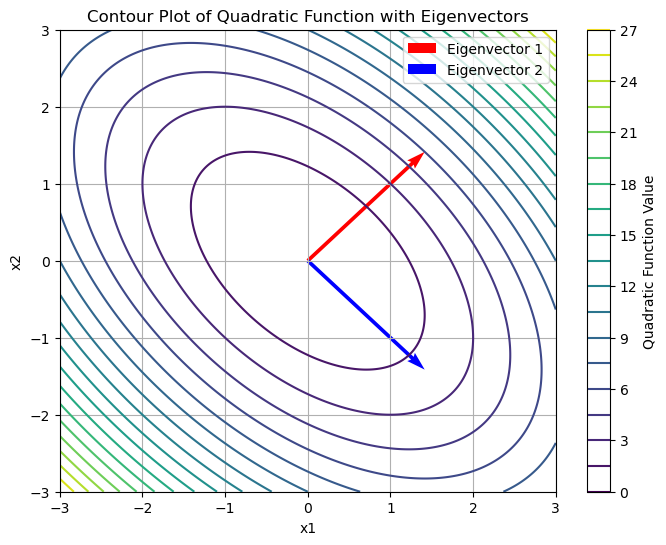

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define the quadratic function
def quadratic_function(x1, x2, A):
    """
    Evaluate the quadratic function F(x) = 0.5 * x^T A x for 2D points.
    
    Args:
    x1, x2 : float
        Input scalar values of the vector.
    A : list of lists (2x2 matrix)
        Hessian matrix representing the quadratic form.
    
    Returns:
    float
        Value of the quadratic function.
    """
    return 0.5 * (A[0][0] * x1**2 + (A[0][1] + A[1][0]) * x1 * x2 + A[1][1] * x2**2)

# Create a grid of points for visualization
x1_vals = np.linspace(-3, 3, 400)
x2_vals = np.linspace(-3, 3, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Define the Hessian matrix (example)
A = [[2, 1], [1, 2]]

# Compute the quadratic function values over the grid
Z = quadratic_function(X1, X2, A)

# Plotting the contour plot of the quadratic function
plt.figure(figsize=(8, 6))
plt.contour(X1, X2, Z, levels=20, cmap="viridis")
plt.colorbar(label="Quadratic Function Value")

# Compute eigenvalues and eigenvectors
eigenvalue1, eigenvalue2 = compute_eigenvalues(A)
eigenvector1 = compute_eigenvectors(A, eigenvalue1)
eigenvector2 = compute_eigenvectors(A, eigenvalue2)

# Scale eigenvectors for visualization
scale = 2
eigenvector1 = [scale * eigenvector1[0], scale * eigenvector1[1]]
eigenvector2 = [scale * eigenvector2[0], scale * eigenvector2[1]]

# Plot the eigenvectors originating from the origin
plt.quiver(0, 0, eigenvector1[0], eigenvector1[1], angles='xy', scale_units='xy', scale=1, color="red", label="Eigenvector 1")
plt.quiver(0, 0, eigenvector2[0], eigenvector2[1], angles='xy', scale_units='xy', scale=1, color="blue", label="Eigenvector 2")

# Labels and title
plt.title("Contour Plot of Quadratic Function with Eigenvectors")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


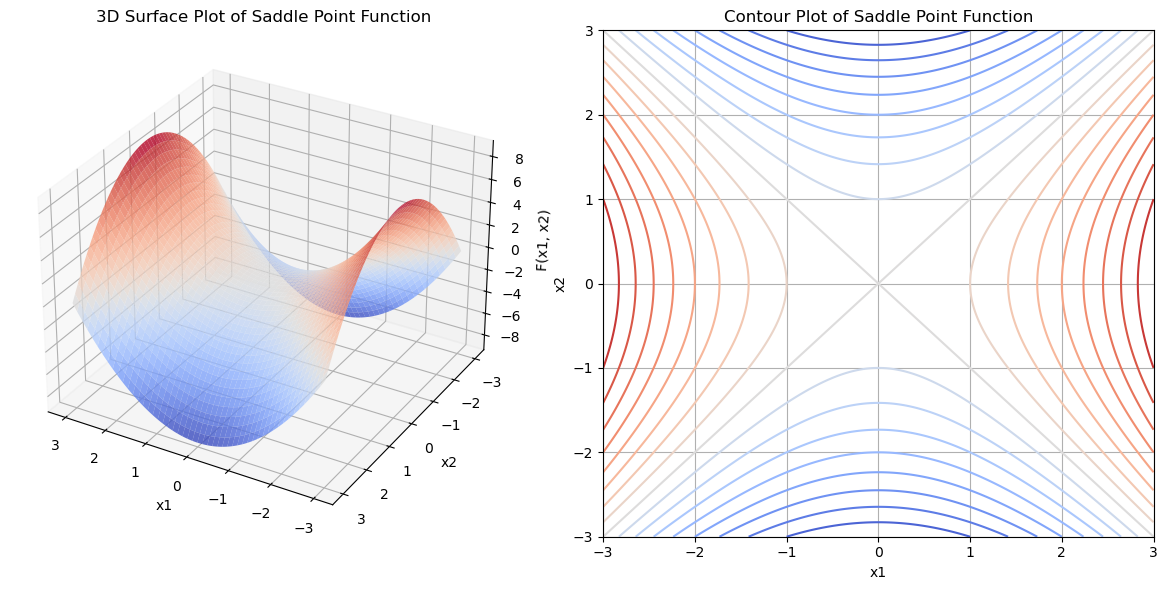

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the saddle point function
def saddle_point_function(x1, x2):
    """
    Evaluate the saddle point function F(x1, x2) = x1^2 - x2^2.
    
    Args:
    x1, x2 : float
        Input scalar values.
    
    Returns:
    float
        Value of the saddle point function.
    """
    return x1**2 - x2**2

# Create a grid of points for visualization
x1_vals = np.linspace(-3, 3, 400)
x2_vals = np.linspace(-3, 3, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Compute the saddle point function values over the grid
Z = saddle_point_function(X1, X2)

# 3D Plot of the saddle point function
fig = plt.figure(figsize=(12, 6))

# 3D Surface plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X1, X2, Z, cmap="coolwarm", edgecolor="none", alpha=0.8)
ax1.set_title("3D Surface Plot of Saddle Point Function")
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('F(x1, x2)')
ax1.view_init(30, 120)  # Adjust view angle for better visualization

# Contour plot with the saddle point
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contour(X1, X2, Z, levels=20, cmap="coolwarm")
ax2.set_title("Contour Plot of Saddle Point Function")
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


## Example of a Quadratic Function with Zero Eigenvalue

As a final example, let’s try a case where one of the eigenvalues is zero. An example of this is given by the following function:

$$
F(x) = \frac{1}{2} x_1^2 - x_1 x_2 + \frac{1}{2} x_2^2
$$

The Hessian matrix and its eigenvalues and eigenvectors are given by:

$$
\nabla^2 F(x) = \begin{bmatrix}
1 & -1 \\
-1 & 1
\end{bmatrix}, \quad \lambda_1 = 2, \quad z_1 = \begin{bmatrix}
1 \\
-1
\end{bmatrix}, \quad \lambda_2 = 0, \quad z_2 = \begin{bmatrix}
-1 \\
1
\end{bmatrix}
$$

The second eigenvalue is zero, so we would expect to have zero curvature along $ z_2 $. Figure .9 shows the contour and 3-D plots for this function, a **stationary valley**. In this case, the Hessian matrix is positive semidefinite, and we have a weak minimum along the line 

$$
x_1 = x_2,
$$

corresponding to the second eigenvector. 

### Summary of Characteristics of Quadratic Functions:

1. If the eigenvalues of the Hessian matrix are all positive, the function will have a single **strong minimum**.
2. If the eigenvalues are all negative, the function will have a single **strong maximum**.
3. If some eigenvalues are positive and others are negative, the function will have a single **saddle point**.
4. If the eigenvalues are all nonnegative, but some eigenvalues are zero, then the function will either have a **weak minimum** (as in Figure.9) or will have no stationary point.
5. If the eigenvalues are all nonpositive, but some eigenvalues are zero, then the function will either have a **weak maximum** or will have no stationary point.

We should note that in this discussion we have assumed, for simplicity, that the stationary point of the quadratic function was at the origin, and that it had a zero value there. This requires that the terms $d$ and $c$ in the general form of the quadratic function:

$$
F(x) = \frac{1}{2} x^T A x + d^T x + c
$$ 

both be zero. If $c$ is nonzero, then the function is simply increased in magnitude by $c$ at every point. The shape of the contours does not change. When $d$ is nonzero, and $A$ is invertible, the shape of the contours is not changed, but the stationary point of the function moves to 

$$
x^* = -A^{-1} d.
$$ 

If $A$ is not invertible (has some zero eigenvalues) and $d$ is nonzero, then stationary points may not exist.


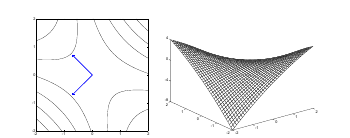

Figure.8 Elongated Saddle


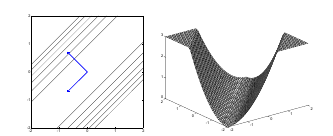

Figure.9 Stationary Valley


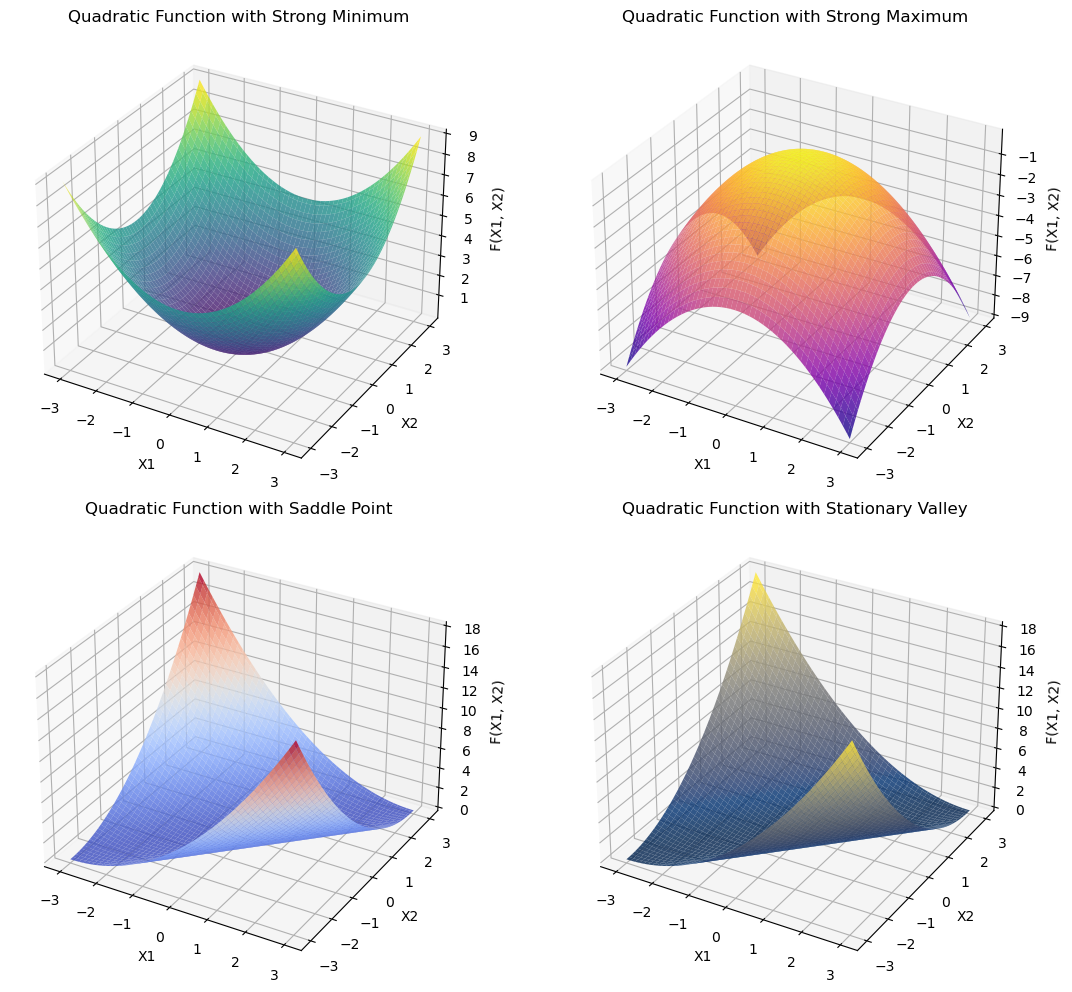

In [6]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Define the quadratic functions
def strong_minimum(x1, x2):
    """Quadratic function with a strong minimum."""
    return (1/2) * (x1**2 + x2**2)

def strong_maximum(x1, x2):
    """Quadratic function with a strong maximum."""
    return - (1/2) * (x1**2 + x2**2)

def saddle_point(x1, x2):
    """Quadratic function with a saddle point."""
    return (1/2) * x1**2 - x1 * x2 + (1/2) * x2**2

def stationary_valley(x1, x2):
    """Quadratic function with a stationary valley."""
    return (1/2) * x1**2 - x1 * x2 + (1/2) * x2**2

# Create a grid of points
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calculate the function values for each quadratic function
Z_minimum = strong_minimum(X1, X2)
Z_maximum = strong_maximum(X1, X2)
Z_saddle = saddle_point(X1, X2)
Z_valley = stationary_valley(X1, X2)

# Plotting the functions
fig = plt.figure(figsize=(12, 10))

# Plot for Strong Minimum
ax1 = fig.add_subplot(221, projection='3d')
ax1.plot_surface(X1, X2, Z_minimum, cmap='viridis', alpha=0.8)
ax1.set_title('Quadratic Function with Strong Minimum')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('F(X1, X2)')

# Plot for Strong Maximum
ax2 = fig.add_subplot(222, projection='3d')
ax2.plot_surface(X1, X2, Z_maximum, cmap='plasma', alpha=0.8)
ax2.set_title('Quadratic Function with Strong Maximum')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('F(X1, X2)')

# Plot for Saddle Point
ax3 = fig.add_subplot(223, projection='3d')
ax3.plot_surface(X1, X2, Z_saddle, cmap='coolwarm', alpha=0.8)
ax3.set_title('Quadratic Function with Saddle Point')
ax3.set_xlabel('X1')
ax3.set_ylabel('X2')
ax3.set_zlabel('F(X1, X2)')

# Plot for Stationary Valley
ax4 = fig.add_subplot(224, projection='3d')
ax4.plot_surface(X1, X2, Z_valley, cmap='cividis', alpha=0.8)
ax4.set_title('Quadratic Function with Stationary Valley')
ax4.set_xlabel('X1')
ax4.set_ylabel('X2')
ax4.set_zlabel('F(X1, X2)')

plt.tight_layout()
plt.show()


In [7]:
# Define the quadratic functions
def strong_minimum(x1, x2):
    """Quadratic function with a strong minimum."""
    return (1 / 2) * (x1**2 + x2**2)

def strong_maximum(x1, x2):
    """Quadratic function with a strong maximum."""
    return - (1 / 2) * (x1**2 + x2**2)

def saddle_point(x1, x2):
    """Quadratic function with a saddle point."""
    return (1 / 2) * x1**2 - x1 * x2 + (1 / 2) * x2**2

def stationary_valley(x1, x2):
    """Quadratic function with a stationary valley."""
    return (1 / 2) * x1**2 - x1 * x2 + (1 / 2) * x2**2

def plot_function(func_name, func, x_range):
    """Plot a function using ASCII characters."""
    width = 50  # Width of the plot
    height = 20  # Height of the plot
    scale = 0.1  # Scale factor for x-axis

    # Create a grid for the plot
    plot = [[' ' for _ in range(width)] for _ in range(height)]

    # Determine the range for x2 based on the function values
    for i in range(width):
        x1 = x_range[0] + i * scale
        for j in range(height):
            x2 = (j - height // 2) * scale  # Center the plot around zero
            z = func(x1, x2)

            # Normalize the function value for plotting
            z_normalized = int((z - (-5)) * (height // 2) / (5 - (-5)))  # Adjust range

            # Check if z_normalized is within the plot bounds
            if 0 <= z_normalized < height:
                plot[height - z_normalized - 1][i] = '*'

    # Print the plot
    print(f"Plot for {func_name}:")
    for row in plot:
        print(''.join(row))
    print("\n")

# Define the range for x1
x_range = (-5, 5)

# Plot each function
plot_function("Strong Minimum", strong_minimum, x_range)
plot_function("Strong Maximum", strong_maximum, x_range)
plot_function("Saddle Point", saddle_point, x_range)
plot_function("Stationary Valley", stationary_valley, x_range)


Plot for Strong Minimum:
                                                  
*                                                 
***                                               
  ***                                             
    ***                                           
      ***                                         
        ****                                      
           ***                                    
             ****                                 
                *****                             
                   *****                          
                      ******                      
                          *******                 
                               **********         
                                    **************
                                                  
                                                  
                                                  
                                                  
      

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not viridis

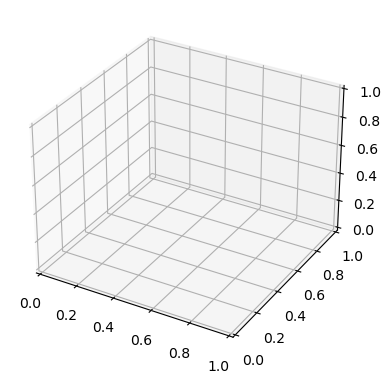

In [8]:
import matplotlib.pyplot as plt

# Define the range for x1 and x2
x1_range = [-5 + i * 0.1 for i in range(101)]  # From -5 to 5
x2_range = [-5 + i * 0.1 for i in range(101)]  # From -5 to 5

# Create a function to calculate Z for strong minimum
def strong_minimum(x1, x2):
    return (1 / 2) * (x1 ** 2 + x2 ** 2)

# Create a function to calculate Z for strong maximum
def strong_maximum(x1, x2):
    return - (1 / 2) * (x1 ** 2 + x2 ** 2)

# Create a function to calculate Z for saddle point
def saddle_point(x1, x2):
    return (1 / 2) * x1 ** 2 - x1 * x2 + (1 / 2) * x2 ** 2

# Create a function to calculate Z for stationary valley
def stationary_valley(x1, x2):
    return (1 / 2) * x1 ** 2 - x1 * x2 + (1 / 2) * x2 ** 2

# Create meshgrid for plotting without using NumPy
X1 = []
X2 = []
Z_min = []
Z_max = []
Z_saddle = []
Z_valley = []

for x1 in x1_range:
    for x2 in x2_range:
        X1.append(x1)
        X2.append(x2)
        Z_min.append(strong_minimum(x1, x2))
        Z_max.append(strong_maximum(x1, x2))
        Z_saddle.append(saddle_point(x1, x2))
        Z_valley.append(stationary_valley(x1, x2))

# Create subplots for each function
fig = plt.figure(figsize=(12, 10))

# Strong Minimum
ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter(X1, X2, Z_min, c='viridis', s=1)
ax1.set_title('Strong Minimum')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('F(X1, X2)')

# Strong Maximum
ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(X1, X2, Z_max, c='plasma', s=1)
ax2.set_title('Strong Maximum')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('F(X1, X2)')

# Saddle Point
ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter(X1, X2, Z_saddle, c='coolwarm', s=1)
ax3.set_title('Saddle Point')
ax3.set_xlabel('X1')
ax3.set_ylabel('X2')
ax3.set_zlabel('F(X1, X2)')

# Stationary Valley
ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter(X1, X2, Z_valley, c='cividis', s=1)
ax4.set_title('Stationary Valley')
ax4.set_xlabel('X1')
ax4.set_ylabel('X2')
ax4.set_zlabel('F(X1, X2)')

# Show the plots
plt.tight_layout()
plt.show()


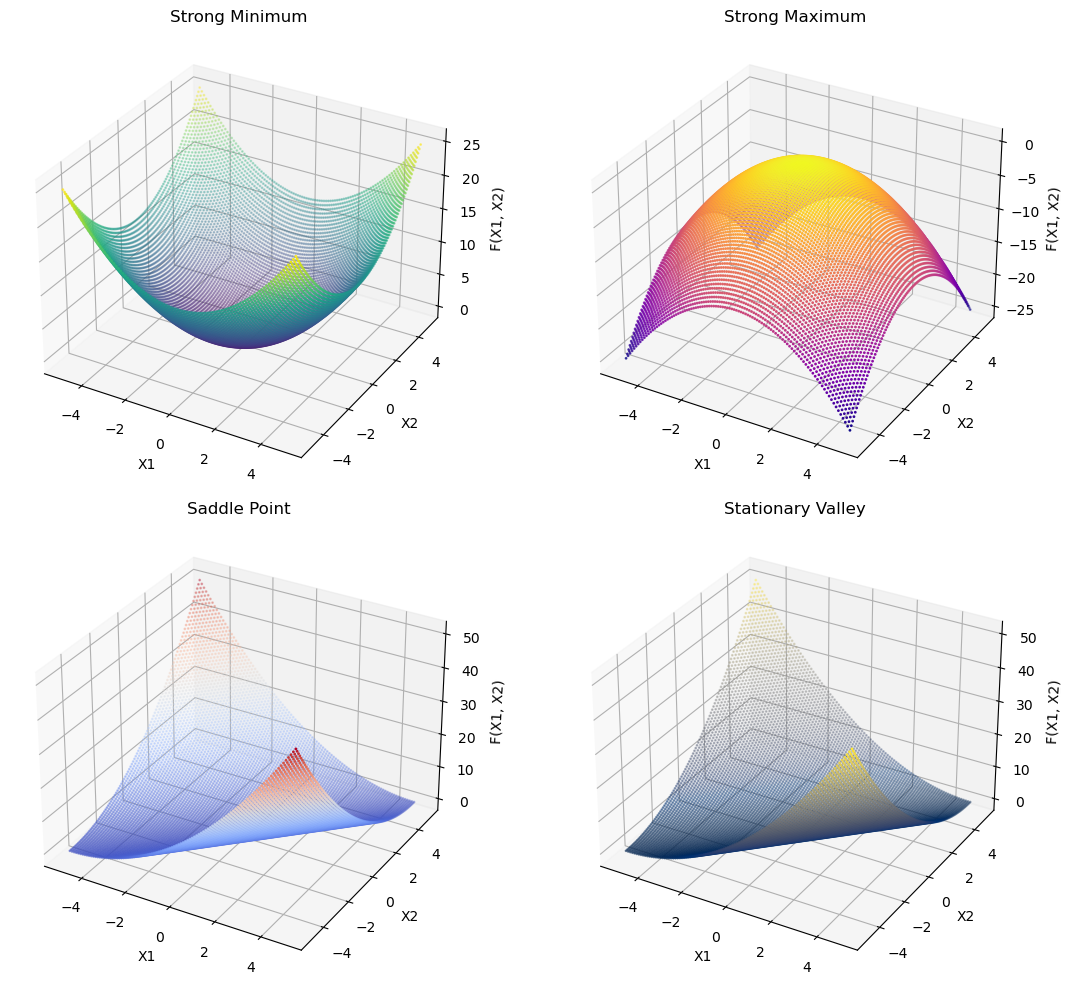

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the range for x1 and x2
x1_range = [-5 + i * 0.1 for i in range(101)]  # From -5 to 5
x2_range = [-5 + i * 0.1 for i in range(101)]  # From -5 to 5

# Create a function to calculate Z for strong minimum
def strong_minimum(x1, x2):
    return (1 / 2) * (x1 ** 2 + x2 ** 2)

# Create a function to calculate Z for strong maximum
def strong_maximum(x1, x2):
    return - (1 / 2) * (x1 ** 2 + x2 ** 2)

# Create a function to calculate Z for saddle point
def saddle_point(x1, x2):
    return (1 / 2) * x1 ** 2 - x1 * x2 + (1 / 2) * x2 ** 2

# Create a function to calculate Z for stationary valley
def stationary_valley(x1, x2):
    return (1 / 2) * x1 ** 2 - x1 * x2 + (1 / 2) * x2 ** 2

# Create meshgrid for plotting without using NumPy
X1 = []
X2 = []
Z_min = []
Z_max = []
Z_saddle = []
Z_valley = []

for x1 in x1_range:
    for x2 in x2_range:
        X1.append(x1)
        X2.append(x2)
        Z_min.append(strong_minimum(x1, x2))
        Z_max.append(strong_maximum(x1, x2))
        Z_saddle.append(saddle_point(x1, x2))
        Z_valley.append(stationary_valley(x1, x2))

# Create subplots for each function
fig = plt.figure(figsize=(12, 10))

# Strong Minimum
ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter(X1, X2, Z_min, c=Z_min, cmap='viridis', s=1)
ax1.set_title('Strong Minimum')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('F(X1, X2)')

# Strong Maximum
ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(X1, X2, Z_max, c=Z_max, cmap='plasma', s=1)
ax2.set_title('Strong Maximum')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('F(X1, X2)')

# Saddle Point
ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter(X1, X2, Z_saddle, c=Z_saddle, cmap='coolwarm', s=1)
ax3.set_title('Saddle Point')
ax3.set_xlabel('X1')
ax3.set_ylabel('X2')
ax3.set_zlabel('F(X1, X2)')

# Stationary Valley
ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter(X1, X2, Z_valley, c=Z_valley, cmap='cividis', s=1)
ax4.set_title('Stationary Valley')
ax4.set_xlabel('X1')
ax4.set_ylabel('X2')
ax4.set_zlabel('F(X1, X2)')

# Show the plots
plt.tight_layout()
plt.show()


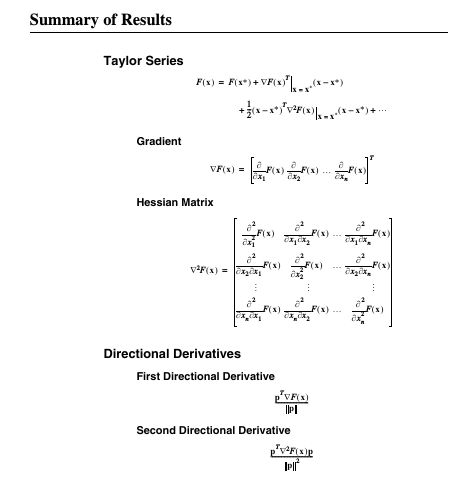

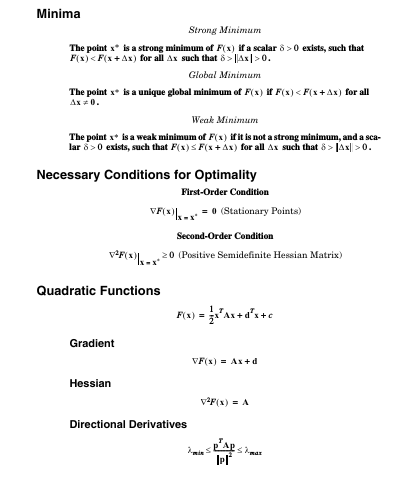